# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
display(data.head())

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [61]:
# Display a description of the dataset
display(data.describe())
print(len(data))

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

440


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [57]:
selected = [16, 47, 21]
print data.head(50)

    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   12669   9656     7561     214              2674          1338
1    7057   9810     9568    1762              3293          1776
2    6353   8808     7684    2405              3516          7844
3   13265   1196     4221    6404               507          1788
4   22615   5410     7198    3915              1777          5185
5    9413   8259     5126     666              1795          1451
6   12126   3199     6975     480              3140           545
7    7579   4956     9426    1669              3321          2566
8    5963   3648     6192     425              1716           750
9    6006  11093    18881    1159              7425          2098
10   3366   5403    12974    4400              5977          1744
11  13146   1124     4523    1420               549           497
12  31714  12319    11757     287              3881          2931
13  21217   6208    14982    3095              6707           602
14  24653 

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
(0, 'Fresh')
(1, 'Milk')
(2, 'Grocery')
(3, 'Frozen')
(4, 'Detergents_Paper')
(5, 'Delicatessen')


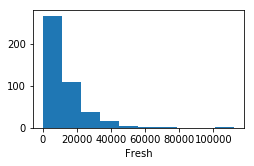

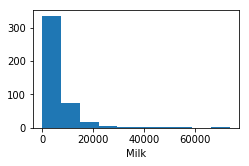

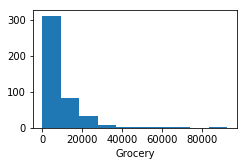

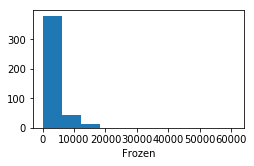

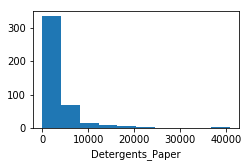

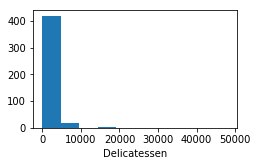

In [79]:
import matplotlib.pyplot as plt

print data.columns.values

for index, label in enumerate(data.columns.values):
    print(index, label)
    plt.figure(figsize=(10, 4))
    plt.subplot(2, 3, index + 1)
    plt.tight_layout()
    plt.xlabel(label)
    plt.hist(data[label])

In [58]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [16, 21, 47]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   1020   8816    12121     134              4508          1080
1   5567    871     2010    3383               375           569
2  44466  54259    55571    7782             24171          6465

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
Looking at the graph above, I think the median would be a better estimator to evaluate a feature, comparing to the mean because the there are much more samples stay in the first quarter in each feature.

- The first sample has a moderate `Fresh` (1020), which is below the first quartile. `Milk`, `Grocery` and `Detergents_Paper` are above average. `Frozen` is very low. `Delicatessen` is more than the median but still less than the average. That makes me think about a small cafeteria or a small coffee shop, where people come to buy a drink.

- The second sample also has a small number of `Fresh` and `Frozen` (5567 and 3383 respectively, below the median). Other features including `Milk`, `Grocery`, `Detergents_Paper` and `Delicatenssen` are quite low, comparing to other samples. I think the establishment type of this customer is a small retailer.

- The third sample is much different. `Fresh`, `Milk`, `Grocery` and `Detergents_Paper` are amazingly larger than these 2 above samples. `Frozen` and `Delicatessen` are also very high (7782 and 6465). All the number of 6 features are above the third quartile, which means they are at the top highest 25%. I believe this is a market.

In [59]:
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [80]:
print(data.head())
print(data.columns.values)
print(data.drop('Milk', axis=1).head())
print(data.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
   Fresh  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669     7561     214              2674          1338
1   7057     9568    1762              3293          1776
2   6353     7684    2405              3516          7844
3  13265     4221    6404               507          1788
4  22615     7198    3915              1777          5185
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   63

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)

scaled_data = scaler.transform(data)

print(scaled_data)

[[ 0.11294004  0.13072723  0.08146416  0.0031063   0.0654272   0.02784731]
 [ 0.06289903  0.13282409  0.10309667  0.02854842  0.08058985  0.03698373]
 [ 0.05662161  0.11918086  0.08278992  0.03911643  0.08605232  0.16355861]
 ..., 
 [ 0.1295431   0.21013575  0.32594285  0.00677142  0.36346267  0.03888194]
 [ 0.091727    0.02622442  0.02402535  0.01664914  0.00404174  0.04426366]
 [ 0.02482434  0.02237109  0.02702178  0.00065742  0.01161082  0.00102211]]


In [83]:
scores = []

for label in data.columns.values:
    new_data = data.drop(label, axis=1)
    target = data[label]
    
    new_data = scaler.fit_transform(new_data)
    target = scaler.fit_transform(target.values.reshape(-1, 1))
    
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=18)
    rgs = DecisionTreeRegressor(random_state=18)
    rgs.fit(X_train, y_train)
    score = rgs.score(X_test, y_test)
    scores.append(score)

print(data.columns.values)
print(scores)
    

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[-0.12981714074824913, 0.22175090003590692, 0.66708599506753974, -4.1482323920994633, 0.6233933541359119, 0.45068969719698271]


In [84]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Fresh'], axis=1)
target = data['Fresh']

scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data)
target = scaler.fit_transform(target.values.reshape(-1, 1))

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=18)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=18)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print(score)

-0.129817140748


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
- I try to predict feature `Fresh`
- The R2 score for the prediction is -0.1298
- This feature is really necessary for identifying customers' spending habits because:  
    I run a test on all 6 features `['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']` by dropping one feature and use DecisionTreeRegressor to predict. The result is respectively `[-0.1298, 0.2218, 0.6671, -4.1482, 0.6234, 0.4507]`. The highest score is 0.7272 for `Grocery` which means that `Grocery` is more correlated to other features and that makes `Grocery` becomes less imoprtant. The score for `Fresh` is only -0.1298. Therefore, we can consider `Fresh` is an important feature because it is hard to predict `Fresh` from other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

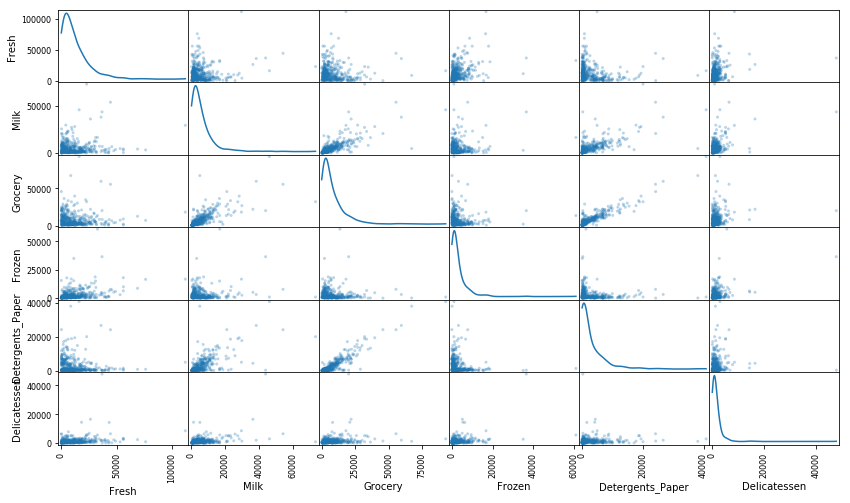

In [85]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to separate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
- According to the scatter matrix above and the correlation matrix below, there are some pairs of efatures which show some degrees of correlation:
    + `Grocery` and `Detergents_Paper`: 0.924
    + `Grocery` and `Milk`: 0.7283
- I think `Grocery` is correlated with `Detergents_Paper` and `Milk`. That makes `Grocery` becomes less important. - On the other hand, `Fresh` is the least correlated feature. Looking at the heatmap and the correlation matrix, `Fresh` is more independent than any other feature. 
- The data is not normally distributed. Looking at the graphs at [Selecting Samples](#Implementation:-Selecting-Samples), most of the data pointts lie in the left of the graph.

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

['', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']


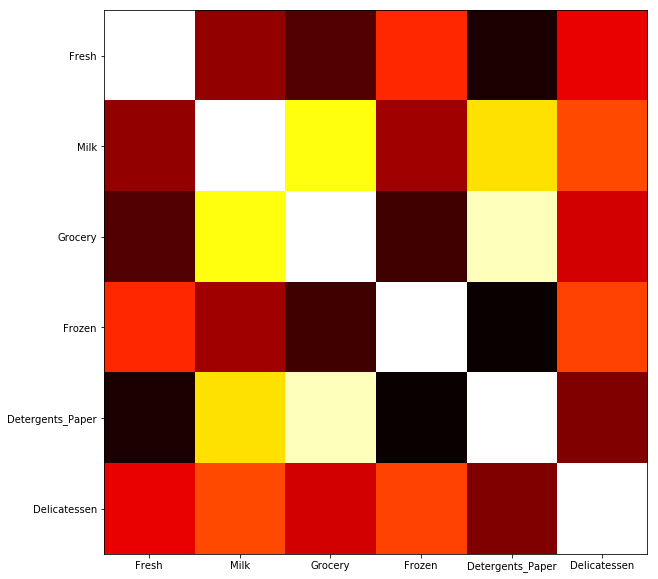

In [183]:
display(data.corr())
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
ax.imshow(data.corr(), cmap='hot', interpolation='nearest')
labels = [''] + data.columns.values.tolist()
print labels
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [86]:
print data.head()
print samples.head()

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   1020   8816    12121     134              4508          1080
1   5567    871     2010    3383               375           569
2  44466  54259    55571    7782             24171          6465


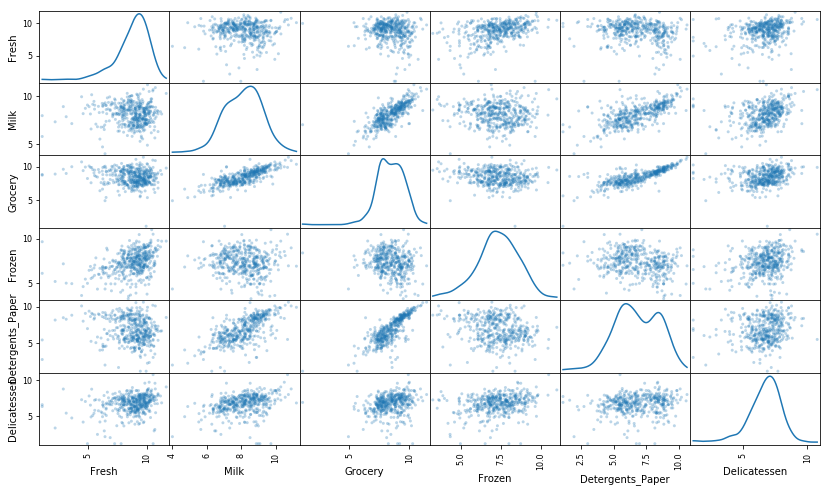

In [87]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [88]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   6.927558   9.084324   9.402695  4.897840          8.413609      6.984716
1   8.624612   6.769642   7.605890  8.126518          5.926926      6.343880
2  10.702480  10.901524  10.925417  8.959569         10.092909      8.774158

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [115]:
print log_data.keys(), len(log_data)
print np.percentile(log_data['Fresh'], 25)
print log_data[log_data['Milk'] > 10].index
print indices



Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object') 440
8.04805870221
Int64Index([23, 45, 47, 56, 61, 85, 86, 92, 171, 181, 183, 211, 251, 265, 319], dtype='int64')
[16, 21, 47]


In [125]:
# OPTIONAL: Select the indices for data points you wish to remove
candidate_outliers = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data['Fresh'], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data['Fresh'], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    removed_data = log_data[(log_data[feature] < Q1 - step) | (log_data[feature] > Q3 + step)]
    removed_index = removed_data.index
    
    for i in removed_index:
        if i not in indices:
            if i not in candidate_outliers:
                candidate_outliers[i] = 1
            else:
                candidate_outliers[i] += 1

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

outliers  = [ i for i in candidate_outliers if candidate_outliers[i] >= 2 ]
print len(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print len(good_data)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
98    6.220590  4.718499  6.656727  6.796824          4.025352      4.882802
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75    9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
122   9.410174  5.303305  5.501258  7.596392          3.218876      6.756932
154   6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
275   6.522093  7.383989  5.407172  6.759255          4.564348      5.937536
356  10.029503  4.897840  5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0     9.446913  9.175335   8.930759  5.365976          7.891331      7.198931
16    6.927558  9.084324   9.402695  4.897840          8.413609      6.984716
25    9.690604  8.349957   8.935245  5.303305          8.294799      4.043051
38    8.431853  9.663261   9.723703  3.496508          8.847360      6.070738
42    9.291920  8.929965   9.613202  5.236442          8.839132      3.828641
51    8.115820  8.306719   8.853094  5.476464          7.338238      5.707110
57    8.597297  9.203618   9.257892  3.637586          8.932213      7.156177
59    8.722091  8.586719   8.992184  4.859812          8.033983      7.379632
60    9.058354  8.021256   8.968778  4.564348          8.317522      5.416100
65    4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
66    2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
94    8.635154  9.410829   9.334591  5.327876          8.524764      5.497168
96    3.135494  7.869402   9.001839  4.976734          8.262043      5.379897
106   7.282074  8.754161   9.278373  4.890349          8.829080      7.512618
108   7.333676  9.035630   8.850947  5.509388          7.826044      7.119636
128   4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
138   9.513182  8.356320   8.523970  5.043425          5.517453      8.092851
144   9.843047  8.209852   7.594884  4.770685          6.246107      5.303305
145  10.000569  9.034080  10.457143  3.737670          9.440738      8.396155
154   6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
155   7.595387  9.277064   9.876116  5.451038          9.356776      7.674617
175   7.759187  8.967632   9.382106  3.951244          8.341887      7.436617
184   5.789960  6.822197   8.457443  4.304065          5.811141      2.397895
216   7.836765  9.717098  10.504684  5.187386          9.496121      6.513230
221   8.593413  8.923058   9.272940  4.510860          8.334952      5.476464
245   8.026824  8.724858   9.540795  5.438079          9.097508      7.931644
264   6.978214  9.177714   9.645041  4.110874          8.696176      7.142827
333   9.055439  8.513185  11.116886  4.875197         10.548022      7.102499
353   4.762174  8.742574   9.961898  5.429346          9.069007      7.013016
355   5.247024  6.588926   7.606885  5.501258          5.214936      4.844187
357   3.610918  7.150701  10.011086  4.919981          8.816853      4.700480
363   8.439664  6.904751   8.397959  5.252273          7.196687      5.749393
379   8.305978  8.549467   9.248695  4.867534          6.700731      5.187386
402  10.186371  8.466531   8.535230  5.393628          2.302585      5.828946
403  10.150582  9.306196   8.434681  4.844187          6.448889      5.662960
412   4.574711  8.190077   9.425452  4.584967          7.996317      4.127134
418   6.492240  9.047115   9.832099  4.890349          8.815815      6.654153
420   8.402007  8.569026   9.490015  3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118  3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038  4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery     Frozen  Detergents_Paper  Delicatessen
26    9.200088  6.867974  7.958926   8.055475          5.488938      6.725034
27    9.566335  6.688355  8.021256   6.184149          4.605170      6.249975
39   10.935942  6.318968  6.804615   9.210540          5.356586      7.977968
54   10.215704  7.278629  7.574045   7.798113          5.318120      7.195187
58    9.530901  7.585789  7.407318   6.390241          5.424950      6.077642
70    9.723463  7.619233  8.071531   9.272658          4.753590      7.218910
75    9.923192  7.036148  1.098612   8.390949          1.098612      6.882437
88    8.970051  6.295266  8.304495   9.183483          5.105945      3.828641
90    9.341807  6.390241  7.401231   8.115820          4.234107      5.886104
93    9.333796  8.035926  7.631432  10.463360          4.262680      7.900266
95    1.098612  7.979339  8.740657   6.086775          5.407172      6.563856
97    5.998937  5.537334  6.413459   6.651572          3.988984      4.143135
98    6.220590  4.718499  6.656727   6.796824          4.025352      4.882802
99    9.175542  7.687997  7.554335   8.637462          5.370638      5.777652
105   9.654193  6.921658  8.286521   6.813445          4.934474      7.228388
110   9.377379  7.407318  7.434848   7.730175          5.129899      7.406711
114   9.800568  6.984716  7.600902   7.845808          4.770685      7.143618
120   9.750336  7.090077  8.135054   7.790282          5.159055      7.035269
122   9.410174  5.303305  5.501258   7.596392          3.218876      6.756932
131   7.650169  6.378426  5.749393   5.846439          4.248495      5.736572
134   8.907612  7.540090  7.684324   6.579251          3.850148      6.285998
135   8.748305  7.161622  7.859799   7.064759          5.293305      5.786897
141  10.321507  9.491904  8.554296   5.771441          3.931826      7.279319
142  10.519646  8.875147  9.018332   8.004700          2.995732      1.098612
146   8.957897  7.568379  7.685703   6.830874          4.290459      6.253829
149  10.367599  7.267525  7.409136   6.684612          4.727388      7.272398
150   9.694309  7.509335  7.475906   6.748760          5.135798      6.972606
154   6.432940  4.007333  4.919981   4.317488          1.945910      2.079442
161   9.428190  6.291569  5.645447   6.995766          1.098612      7.711101
162   9.627536  7.612831  8.245384   7.887959          5.446737      6.413459
..         ...       ...       ...        ...               ...           ...
355   5.247024  6.588926  7.606885   5.501258          5.214936      4.844187
356  10.029503  4.897840  5.384495   8.057377          2.197225      6.306275
359   6.679599  8.678972  7.653969   5.828946          5.446737      6.654153
361   8.462526  6.408529  6.761573   7.095064          5.068904      6.003887
362   7.659643  7.378384  7.805067   6.327937          5.187386      6.568078
366   9.165448  7.703910  7.416980   7.067320          5.402677      6.102559
368  10.013910  7.086738  7.785721   7.623642          4.615121      6.324359
369   8.734077  5.820083  6.526495   6.993015          3.713572      5.690359
377  10.565995  8.056427  7.881560   6.941190          4.564348      7.124478
378   8.078688  8.099858  7.550661   5.641907          4.219508      7.015712
381   9.785267  8.431853  7.388328   9.203014          5.505332      6.276643
385   9.361773  6.826545  7.386471   7.856707          5.257495      6.973543
387   9.948365  7.557995  7.360740   7.580700          5.442418      6.867974
388   9.188606  6.742881  7.066467   7.424762          5.298317      6.006353
389   9.146868  7.333023  7.259820   8.012681          5.424950      6.527958
391   7.881182  7.923348  7.746301   6.810142          4.553877      7.510431
392   6.249975  8.338067  8.188689   6.490724          4.804021      6.483107
394   9.423595  6.762730  8.072155   7.242798          5.003946      6.113682
397   9.353141  7.418181  7.264030   8.830251          4.158883      6.610696
398   9.345046  6.939254  6.366

Data points considered outliers for the feature 'Delicatessen':


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
25    9.690604  8.349957   8.935245  5.303305          8.294799      4.043051
42    9.291920  8.929965   9.613202  5.236442          8.839132      3.828641
43    6.445720  9.314250  10.085726  6.668228          9.162095      4.276666
44    9.176784  8.857515   9.256365  6.293419          8.437717      4.174387
53    6.196444  9.256556   9.352881  6.612041          8.632484      5.411646
60    9.058354  8.021256   8.968778  4.564348          8.317522      5.416100
66    2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
69    9.030256  7.944492   7.164720  6.658011          6.486161      4.969813
72    8.393895  8.544614   7.886457  9.090656          7.186144      5.198497
78    9.284148  7.069023   7.633854  7.647786          5.707110      5.117994
81    5.389072  9.163249   9.575192  5.645447          8.964184      5.049856
84    9.381517  8.109826   8.479284  7.071573          8.252446      4.787492
88    8.970051  6.295266   8.304495  9.183483          5.105945      3.828641
94    8.635154  9.410829   9.334591  5.327876          8.524764      5.497168
96    3.135494  7.869402   9.001839  4.976734          8.262043      5.379897
97    5.998937  5.537334   6.413459  6.651572          3.988984      4.143135
98    6.220590  4.718499   6.656727  6.796824          4.025352      4.882802
109   7.248504  9.724899  10.274568  6.511745          6.728629      1.098612
116   9.321255  7.832411   8.118207  7.324490          5.736572      5.402677
123   9.320987  9.284427   9.084097  7.693482          7.588830      4.962845
128   4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
137   8.034955  8.997147   9.021840  6.493754          6.580639      3.583519
142  10.519646  8.875147   9.018332  8.004700          2.995732      1.098612
144   9.843047  8.209852   7.594884  4.770685          6.246107      5.303305
152   9.843738  7.223296   8.050384  8.006701          5.863631      5.214936
154   6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
164   8.561019  8.936298   9.057655  7.839919          8.209036      5.472271
176  10.728540  8.847647   8.785081  8.904902          7.334329      5.438079
182   6.542472  9.051696   9.260843  6.093570          8.840291      5.049856
184   5.789960  6.822197   8.457443  4.304065          5.811141      2.397895
..         ...       ...        ...       ...               ...           ...
203   6.368187  6.529419   7.703459  6.150603          6.860664      2.890372
207   7.840313  8.463159   8.714239  7.988204          8.578476      4.787492
219   8.332068  5.905362   7.237059  7.743270          4.454347      4.867534
221   8.593413  8.923058   9.272940  4.510860          8.334952      5.476464
228   7.533159  6.357842   6.349139  6.856462          8.468423      5.313206
233   6.871091  8.513988   8.106515  6.842683          6.013715      1.945910
236   9.063579  6.709304   8.021913  7.745868          6.028279      5.416100
238   8.904223  6.163315   6.371612  7.013915          4.276666      5.375278
269   9.630234  5.552960   7.037028  7.830426          5.808142      5.318120
270   8.459564  6.939254   6.882437  8.612503          5.283204      4.025352
277   9.111735  6.720220   6.526495  9.736193          6.431331      4.934474
285  10.602965  6.461468   8.188689  6.948897          6.077642      2.890372
286   8.874728  7.717351   7.124478  7.389564          7.111512      4.852030
289  10.663966  5.655992   6.154858  7.235619          3.465736      3.091042
301   8.572249  9.496722   9.923241  7.500529          9.077038      5.147494
303   7.862882  8.212840   9.534523  6.198479          9.217217      4.077537
305   5.493061  9.468001   9.088399  6.683361          8.271037      5.351858
311  10.296711  7.755767   9.021598  8.021585          5.916202      4.762174
312   7.667158  8.226038   9.861206  7.149917          9.748003      4.955827
318   9.375855  7.905810   8.17

41
399


In [124]:
print candidate_outliers
print len(candidate_outliers)
print len([ p for p in candidate_outliers if candidate_outliers[p] >= 2])

{0: 1, 25: 2, 26: 1, 27: 1, 38: 1, 39: 1, 42: 2, 43: 1, 44: 1, 51: 1, 53: 1, 54: 1, 57: 1, 58: 1, 59: 1, 60: 2, 65: 2, 66: 3, 69: 1, 70: 1, 72: 1, 75: 2, 78: 1, 81: 2, 84: 1, 88: 2, 90: 1, 93: 1, 94: 2, 95: 2, 96: 3, 97: 2, 98: 3, 99: 1, 105: 1, 106: 1, 108: 1, 109: 1, 110: 1, 114: 1, 116: 1, 120: 1, 122: 3, 123: 1, 128: 3, 131: 1, 134: 1, 135: 1, 137: 1, 138: 1, 141: 1, 142: 2, 144: 2, 145: 1, 146: 1, 149: 1, 150: 1, 152: 1, 154: 5, 155: 1, 161: 1, 162: 1, 164: 1, 168: 1, 169: 1, 171: 1, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 182: 1, 183: 1, 184: 2, 185: 2, 187: 1, 190: 2, 191: 2, 192: 1, 193: 1, 203: 1, 204: 1, 207: 1, 210: 1, 212: 1, 216: 1, 217: 1, 218: 1, 219: 2, 220: 1, 221: 2, 224: 1, 228: 1, 233: 1, 236: 1, 237: 1, 238: 2, 245: 1, 247: 1, 250: 1, 252: 1, 255: 1, 261: 1, 264: 1, 269: 1, 270: 2, 271: 1, 272: 1, 273: 1, 275: 2, 277: 1, 280: 1, 285: 1, 286: 1, 289: 2, 291: 1, 301: 1, 303: 1, 304: 1, 305: 2, 311: 1, 312: 1, 313: 1, 316: 1, 318: 1, 321: 1, 322: 1, 324: 1, 327: 1, 32

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- There are some data points considered outliers for more than one feature such as sample 25 (`Delicatessen`, `Frozen`) and sample 60 (`Delicatessen`, `Frozen`). Those points are saved in the `candidate_outliers` above.
- I think these points should be removed from the dataset because they have more than or equal to 2 outlier features.
- I remove all the points which have >= 2 outlier features because I think they can be the noises when we try to classify or regress our data. The points with only 1 outlier feature can still be kept. There are 179 "`>= 1 outlier-feature`" points and 41 "`>=2 outlier-feature`" points. If we remove all the points with only 1 outlier feature, we will have to remove half of our data.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

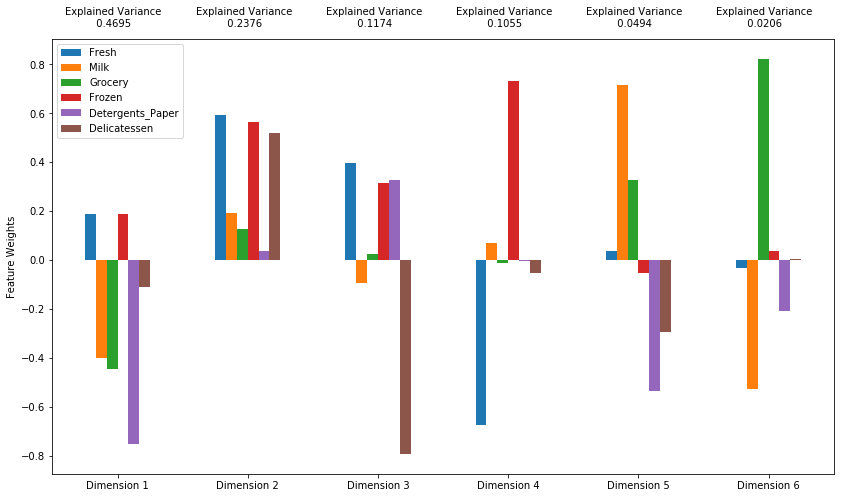

In [126]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=18)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [142]:
print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.components_
print pca.components_[0], np.sum(pca.components_[0])
print pca.components_[:, 0], np.sum(pca.components_[:, 0])
print good_data.keys()

[ 4.09505999  2.07252028  1.02432907  0.91981358  0.43126474  0.17925803]
[ 0.46949606  0.23761315  0.11743869  0.10545605  0.04944423  0.02055182]
[[ 0.18701913 -0.39870027 -0.44309507  0.18975449 -0.749596   -0.10875552]
 [ 0.59396878  0.19183056  0.12724419  0.56611883  0.03855222  0.52176071]
 [ 0.39621125 -0.09177731  0.027372    0.316735    0.32654021 -0.79176687]
 [-0.67285444  0.07064282 -0.01319638  0.73433674 -0.00402841 -0.05325105]
 [ 0.03945344  0.71689501  0.32888303 -0.05113601 -0.53621944 -0.29358943]
 [-0.03085282 -0.52620072  0.82364328  0.03628103 -0.2060183   0.00357685]]
[ 0.18701913 -0.39870027 -0.44309507  0.18975449 -0.749596   -0.10875552] -1.32337323734
[ 0.18701913  0.59396878  0.39621125 -0.67285444  0.03945344 -0.03085282] 0.512945343988
Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- The variance ratios of 6 features are 0.4695, 0.2376, 0.1174, 0.1055, 0.0494, 0.0206
- 0.4695 + 0.2376 = 0.7071 variance in the data is explained by the first and second principal component.
- 0.4695 + 0.2376 + 0.1174 + 0.1055 = 0.93 variance in the data is explained by the first 4 principal components.
- First four dimensions:
    + Dimension 1: A variance increment in Dimension 1 is equivalent to a small variance increment in `Fresh` (0.187) and `Frozen` (0.189). `Milk`, `Grocery` and `Detergents_Paper` decrease quite a lot with -0.398, -0.443 and -0.749 respectively.
    + Dimension 2: An increment in Dimension 2 makes all the variances of the features increase. `Fresh`, `Frozen` and `Delicatessen` increase largely with 0.594, 0.566 and 0.522.
    + Dimension 3: A variance increment in Dimension 3 increases the variances of `Fresh`, `Frozen` and `Detergents_Paper`. However, there is a hugh decrement with `Delicatessen` (-0.792)
    + Dimension 4: A variance increment of Dimension 4 only makes significant changes in `Fresh` (-0.6730) and `Frozen` (0.734)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [132]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.7442      -2.1720      -1.2429      -0.4935       0.1348   
1       1.8385      -0.4391       0.3107       0.6399      -0.6921   
2      -4.1201       3.9103       0.5457      -0.0446       0.4538   

   Dimension 6  
0      -0.0700  
1       0.2429  
2      -0.0807

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [148]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=18)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [149]:
display(reduced_data.head())

Dimension 1  Dimension 2
0    -1.643197    -0.361564
1    -1.650087     0.673165
2    -1.681249     1.515834
3     1.316250     1.202143
4    -0.571506     2.201718

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [150]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.7442      -2.1720
1       1.8385      -0.4391
2      -4.1201       3.9103

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

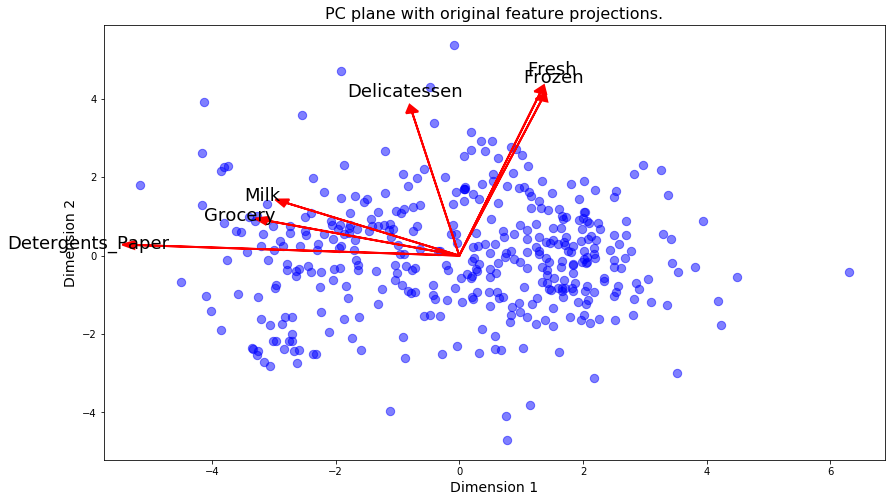

In [147]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- Advantages of K-Means clustering:
    + Simple, intuitive, computationally cheap
    + Easy for implementation and visualization
    + Separate data into groups clearly (hard clustering)
- Advantages of Gaussian Mixture Model:
    + Flexible, a point can belong to multiple group (soft clustering)
- I believe a Gaussian Mixture Model is more suitable because our dataset seems that we can not find a hard margin to seperate the data. Moreover, a customer can belong to many groups.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [157]:
print reduced_data.head()
print log_samples

   Dimension 1  Dimension 2
0    -1.643197    -0.361564
1    -1.650087     0.673165
2    -1.681249     1.515834
3     1.316250     1.202143
4    -0.571506     2.201718
       Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   6.927558   9.084324   9.402695  4.897840          8.413609      6.984716
1   8.624612   6.769642   7.605890  8.126518          5.926926      6.343880
2  10.702480  10.901524  10.925417  8.959569         10.092909      8.774158


In [160]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

max_score = 0
selected_i = None

for i in range(2, 11):
    cls = GaussianMixture(n_components=i)
    cls.fit(reduced_data)
    preds = cls.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    print i, score
    
    if score > max_score:
        max_score = score 
        selected_i = i
        
print 'Selected', selected_i, max_score

2 0.444477046625
3 0.366383147955
4 0.333807752972
5 0.309259183328
6 0.243552794249
7 0.310359839433
8 0.207315428555
9 0.331184555688
10 0.319315698988
Selected 2 0.444477046625


In [162]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print score

0.444477046625


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
- I try to test the number of clusters from 2 to 10

|n|score|
|-|-----|
|2|0.4445|
|3|0.3664|
|4|0.3338|
|5|0.3093|
|6|0.2436|
|7|0.3104|
|8|0.2073|
|9|0.3312|
|10|0.3193|

- Looking at the table, n = 2 is the one with the best score (0.4445)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

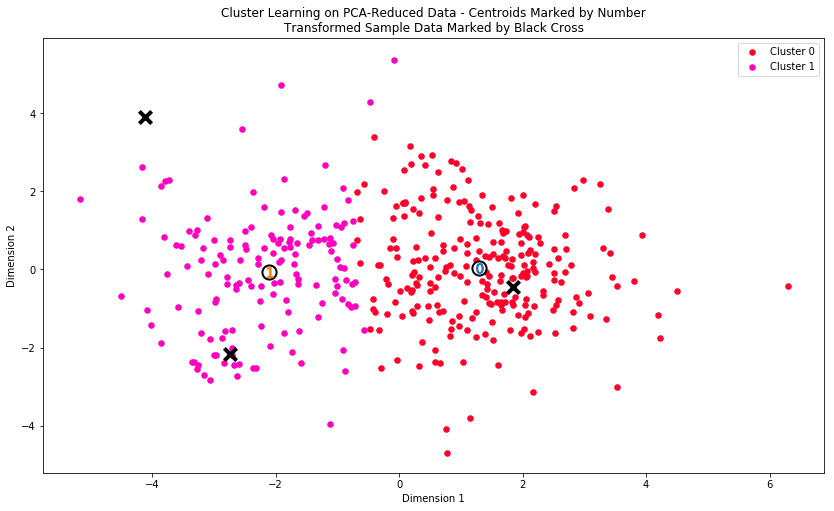

In [163]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [164]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9419.0  2180.0   2799.0  2170.0             378.0         838.0
Segment 1  4667.0  8284.0  12456.0  1069.0            4822.0        1144.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

- `Segment 0` has all the amount of money spent in each feature below the mean. All the features excluding `Fresh` are in the second quarter. I assume that this is a retailer.
- `Segment 1` is different. The amount of `Milk`, `Grocery` and `Detergents_Paper` is high enough to be in the final quarter. I think this is the establishment of a cafe or a restaurant.

In [165]:
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [166]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
I evaluated sample 1 is a retailer, sample 0 is a small cafeteria and sample 2 is a market. Because there is only 2 clusters so I would choose sample 1 to be in the Cluster 0 and the rest is in the Cluster 1. I think the predictions for each sample point are consistent with this evaluation.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The change would not a affect all the customers equally. 
- **Group of Segment 0**: retailers  
  They will not be affected much. The amount of money spending on `Fresh`, `Grocery`, `Frozen`, `Detergents_Paper`, `Milk` and `Delicatessen` is moderate. Changing the delivery service from  5 days per week to 3 days per week wouldn't make a big difference for them.
- **Group of Segment 1**: cafe/restaurants  
  They will be affected a lot. Their amount of `Grocery` or `Fresh` is much higher than group 0. They need to evaluate and calculate carefully. For example, `Frozen` needs to be maintained in a good condition. Even only a day would make a big changes for those kind of stuff. Therefore, the delivery has to be stable for them.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** We could use a supervised classifier to classify the new customers. This learner could be SVM, Logistic Regressor or Decision Tree. The features will be all 6 features we have: `Fresh`, `Frozen`, `Milk`, etc. The target variable would be the group (group 0 or group 1).  
After training, we could easily fit the new customers to the most appropriate group.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

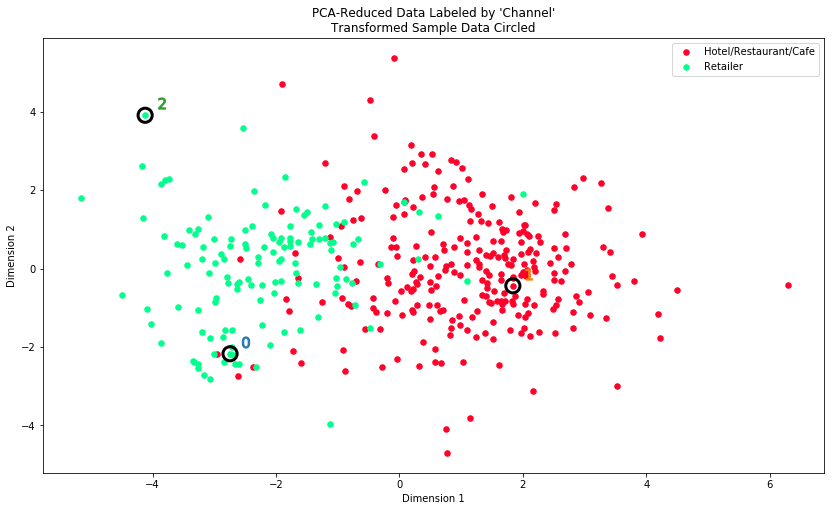

In [167]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- The clustering algorithm and the number of clusters (2) which I chose is the same as this distribution. The clusters are a little bit different at some points but those points don't affect the segments much.
- There is no customer segment that would be classified as purely `Retailers` or `Hotels/Restaurants/Cafes` by this distribution. Those segments don't have a clearly separated margin.
- I would consider these classifications as consistent as my previous definition. In general, they are the same. Group 0 is the segment which the customers spend less than group 1, which the customers usually spend a lot on every merchandise.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.